In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
df = pd.read_csv(r"C:\Users\Admin\Documents\Apshce project\traffic volume - traffic volume.csv")
print(df.head())
print(df.info())


  holiday    temp  rain  snow weather        date      Time  traffic_volume
0     NaN  288.28   0.0   0.0  Clouds  02-10-2012   9:00:00            5545
1     NaN  289.36   0.0   0.0  Clouds  02-10-2012  10:00:00            4516
2     NaN  289.58   0.0   0.0  Clouds  02-10-2012  11:00:00            4767
3     NaN  290.13   0.0   0.0  Clouds  02-10-2012  12:00:00            5026
4     NaN  291.14   0.0   0.0  Clouds  02-10-2012  13:00:00            4918
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         61 non-null     object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         61 non-null     object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB
None


In [4]:
# Drop 'holiday' due to too many nulls
df.drop('holiday', axis=1, inplace=True)

# Drop rows with missing values in other important columns
df.dropna(inplace=True)

In [6]:
# Combine date and time correctly
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['Time'], dayfirst=True)

# Extract datetime features
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['weekday'] = df['datetime'].dt.weekday

# Drop original date/time fields
df.drop(['date', 'Time', 'datetime'], axis=1, inplace=True)


In [7]:
# Step 4: Encode 'weather'
le = LabelEncoder()
df['weather'] = le.fit_transform(df['weather'])


In [8]:
# Step 5: Define features (X) and target (y)
X = df.drop('traffic_volume', axis=1)
y = df['traffic_volume']


In [9]:
# Step 6: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [11]:
# Step 7: Train the model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [12]:
# Step 8: Make predictions and evaluate
y_pred = model.predict(X_test)

print("📊 Model Evaluation Metrics:")
print(f"MAE  : {mean_absolute_error(y_test, y_pred):.2f}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"R²   : {r2_score(y_test, y_pred):.4f}")


📊 Model Evaluation Metrics:
MAE  : 211.90
RMSE : 371.16
R²   : 0.9653


In [15]:
joblib.dump(model, "D:/traffic_model.pkl")



['D:/traffic_model.pkl']

In [16]:
import joblib

model = joblib.load("D:/traffic_model.pkl")


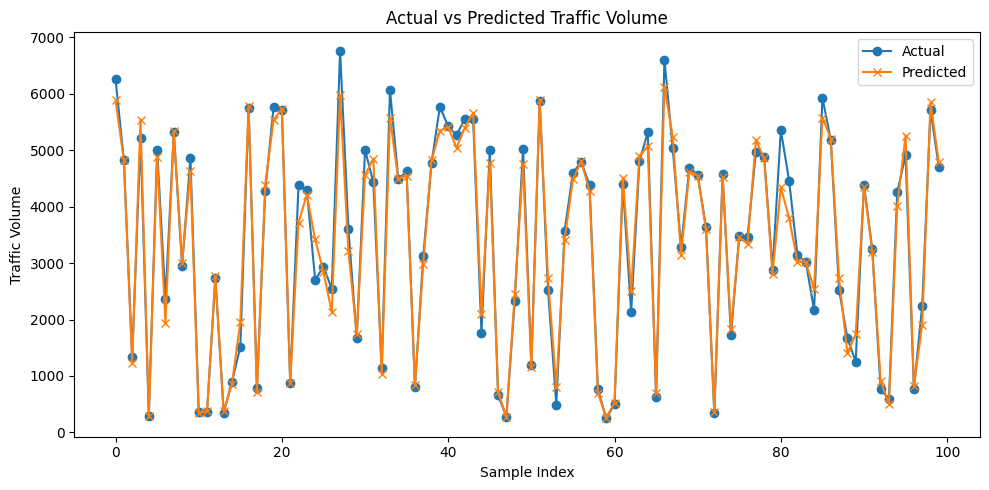

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label='Actual', marker='o')
plt.plot(y_pred[:100], label='Predicted', marker='x')
plt.title("Actual vs Predicted Traffic Volume")
plt.xlabel("Sample Index")
plt.ylabel("Traffic Volume")
plt.legend()
plt.tight_layout()
plt.show()


In [18]:
import joblib
import pandas as pd

# Step 1: Load the saved model
model = joblib.load("D:/traffic_model.pkl")

# Step 2: Create a DataFrame with test input
# (example: 1 row of data with values you want to test)
test_data = pd.DataFrame([{
    'temp': 288.5,
    'rain': 0.0,
    'snow': 0.0,
    'weather': 1,      # Example: 0 = Clear, 1 = Clouds (depends on your encoding)
    'hour': 9,
    'day': 12,
    'month': 10,
    'weekday': 4       # 0 = Monday, ..., 6 = Sunday
}])

# Step 3: Predict traffic volume
prediction = model.predict(test_data)
print(f"Predicted Traffic Volume: {int(prediction[0])}")


Predicted Traffic Volume: 4876


In [19]:
test_data = pd.DataFrame([
    {'temp': 289.0, 'rain': 0.0, 'snow': 0.0, 'weather': 0, 'hour': 8, 'day': 14, 'month': 10, 'weekday': 4},
    {'temp': 295.2, 'rain': 1.5, 'snow': 0.0, 'weather': 2, 'hour': 17, 'day': 15, 'month': 10, 'weekday': 5},
])
predictions = model.predict(test_data)
print(predictions)


[5694.81 3973.45]


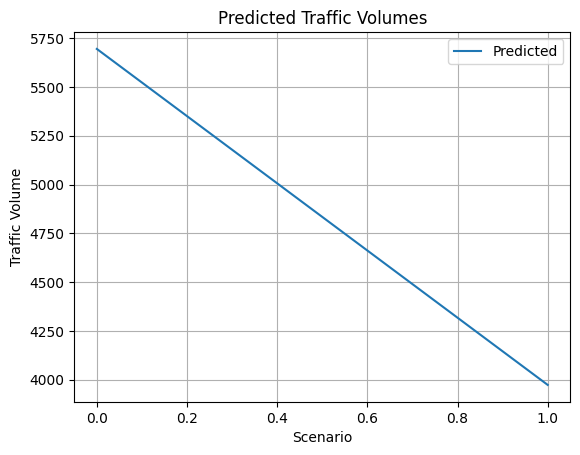

In [20]:
import matplotlib.pyplot as plt

plt.plot(predictions, label='Predicted')
plt.title("Predicted Traffic Volumes")
plt.ylabel("Traffic Volume")
plt.xlabel("Scenario")
plt.legend()
plt.grid(True)
plt.show()


In [21]:
import joblib
joblib.dump(model, "traffic_model.pkl", compress=3)  # save it again cleanly


['traffic_model.pkl']